In [0]:
# File location and type
file_location = "/FileStore/tables/spotify_2023-1.csv"
file_type = "csv"

infer_schema = "true"
first_row_is_header = "true"
delimiter = ","


df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)




In [0]:
file_location2022 = "/FileStore/tables/final.csv"
file_type2022 = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df2022 = spark.read.format(file_type2022) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location2022)



In [0]:
df.columns

Out[21]: ['track_name',
 'artist(s)_name',
 'artist_count',
 'released_year',
 'released_month',
 'released_day',
 'in_spotify_playlists',
 'in_spotify_charts',
 'streams',
 'in_apple_playlists',
 'in_apple_charts',
 'in_deezer_playlists',
 'in_deezer_charts',
 'in_shazam_charts',
 'bpm',
 'key',
 'mode',
 'danceability_%',
 'valence_%',
 'energy_%',
 'acousticness_%',
 'instrumentalness_%',
 'liveness_%',
 'speechiness_%']

In [0]:
from pyspark.sql.functions import col

# Drop the '_c0' column
df2022 = df2022.drop('_c0')
df2022_global = df2022.filter(col("region") == "Global")





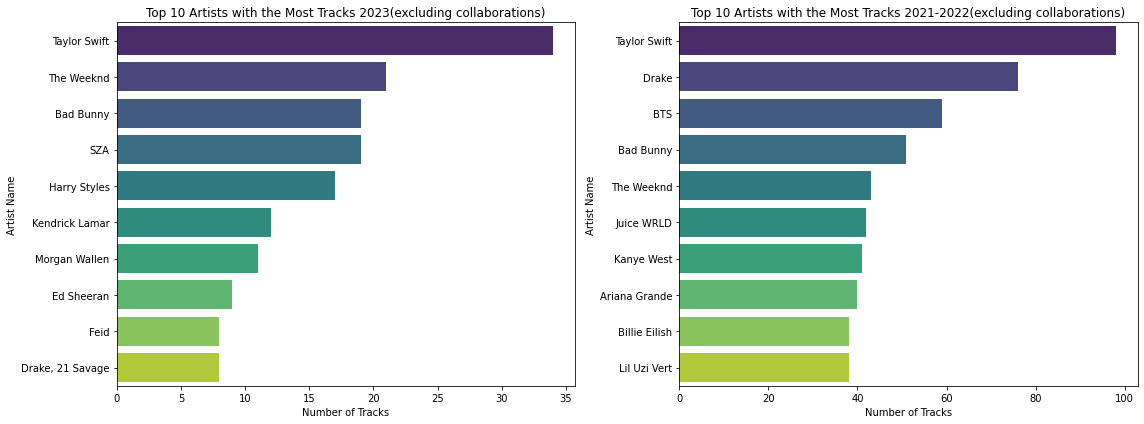

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql import functions as F



# Count the number of unique tracks per artist for the original DataFrame
artist_track_counts_2023 = df.groupBy("artist(s)_name", "track_name").agg(F.countDistinct("track_name").alias("track_count"))
artist_track_counts_2023 = artist_track_counts_2023.groupBy("artist(s)_name").agg(F.sum("track_count").alias("total_track_count"))
top_artists_2023 = artist_track_counts_2023.orderBy("total_track_count", ascending=False).limit(10).toPandas()


# Plot for the original DataFrame
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.barplot(x="total_track_count", y="artist(s)_name", data=top_artists_2023, palette="viridis")
plt.xlabel('Number of Tracks')
plt.ylabel('Artist Name')
plt.title('Top 10 Artists with the Most Tracks 2023(excluding collaborations)')

# Count the number of unique tracks per artist for the new DataFrame (df2022)
artist_track_counts_2022 = df2022_global.groupBy("artist_names", "track_name").agg(F.countDistinct("track_name").alias("track_count"))
artist_track_counts_2022 = artist_track_counts_2022.groupBy("artist_names").agg(F.sum("track_count").alias("total_track_count"))
top_artists_2022 = artist_track_counts_2022.orderBy("total_track_count", ascending=False).limit(10).toPandas()

# Plot for the new DataFrame (df2022)
plt.subplot(1, 2, 2)
sns.barplot(x="total_track_count", y="artist_names", data=top_artists_2022, palette="viridis")
plt.xlabel('Number of Tracks')
plt.ylabel('Artist Name')
plt.title('Top 10 Artists with the Most Tracks 2021-2022(excluding collaborations)')

plt.tight_layout()
plt.show()



In [0]:
# Group by artist_names and sum the streams
top_artists_2023 = df.groupBy("artist(s)_name").agg(F.sum("streams").alias("total_streams"))

# Sort by total_streams in descending order
top_artists_2023 = top_artists_2023.orderBy(F.desc("total_streams"))

# Show the top streamed artists for 2023
top_artists_2023.count()


Out[24]: 645

In [0]:
# Group by artist_names and track_name, then sum the streams
top_artists_2022_global = df2022_global.groupBy("artist_names").agg(F.sum("streams").alias("total_streams"))

# Sort by total_streams in descending order
top_artists_2022_global = top_artists_2022_global.orderBy(F.desc("total_streams")).limit(10)

# Show the top streamed artists for 2022 global
top_artists_2022_global.show()


+--------------+---------------+
|  artist_names|  total_streams|
+--------------+---------------+
|    Ed Sheeran|1.1221847622E10|
| Billie Eilish|  8.636826981E9|
| Ariana Grande|   7.50810203E9|
|         Drake|  7.111000669E9|
|    The Weeknd|  6.851488414E9|
|   Post Malone|  6.830917991E9|
|Olivia Rodrigo|  6.533157293E9|
|  XXXTENTACION|  6.426235584E9|
|  Harry Styles|  6.391375151E9|
|     Bad Bunny|   5.80071741E9|
+--------------+---------------+



In [0]:
taylor_swift_tracks = df.filter(df["artist(s)_name"].contains("Taylor Swift"))

taylor_swift_unique_tracks = taylor_swift_tracks.select("track_name").distinct()

# Show the tracks made by Taylor Swift
display(taylor_swift_unique_tracks)

track_name
"Would've, Could've, Should've"
Bejeweled
Lavender Haze
Midnight Rain
Cruel Summer
Enchanted (Taylor's Version)
I Can See You (Taylor���s Version) (From The
This Love (Taylor���s Ve
Style
Enchanted


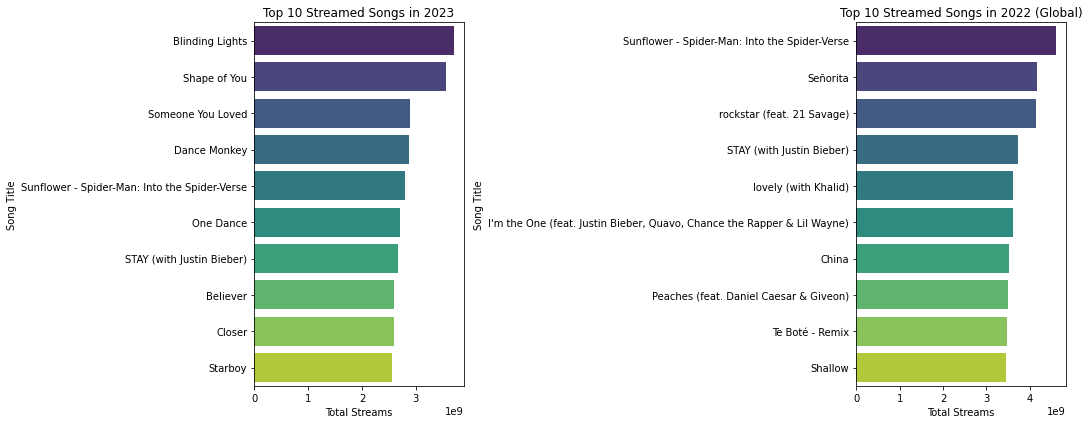

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate total streams for each song in df (2023 dataset)
top_songs_2023 = df.groupBy("track_name").agg(F.sum("streams").alias("total_streams_2023")) \
                   .orderBy(F.desc("total_streams_2023")).limit(10).toPandas()

# Calculate total streams for each song in df2022_global (2022 global dataset)
# Group by track_name and sum the streams for 2022 global dataset
top_songs_2022_global_unique = df2022_global.groupBy("track_name").agg(F.sum("streams").alias("total_streams_2022_global")) \
                                             .orderBy(F.desc("total_streams_2022_global")).limit(10).toPandas()
                              
# Plot side by side using Seaborn
plt.figure(figsize=(15, 6))

# Plot for df (2023 dataset)
plt.subplot(1, 2, 1)
sns.barplot(x="total_streams_2023", y="track_name", data=top_songs_2023, palette="viridis")
plt.title('Top 10 Streamed Songs in 2023')
plt.xlabel('Total Streams')
plt.ylabel('Song Title')

# Plot for df2022_global (2022 global dataset)
plt.subplot(1, 2, 2)
sns.barplot(x="total_streams_2022_global", y="track_name", data=top_songs_2022_global_unique, palette="viridis")
plt.title('Top 10 Streamed Songs in 2022 (Global)')
plt.xlabel('Total Streams')
plt.ylabel('Song Title')

plt.tight_layout()
plt.show()


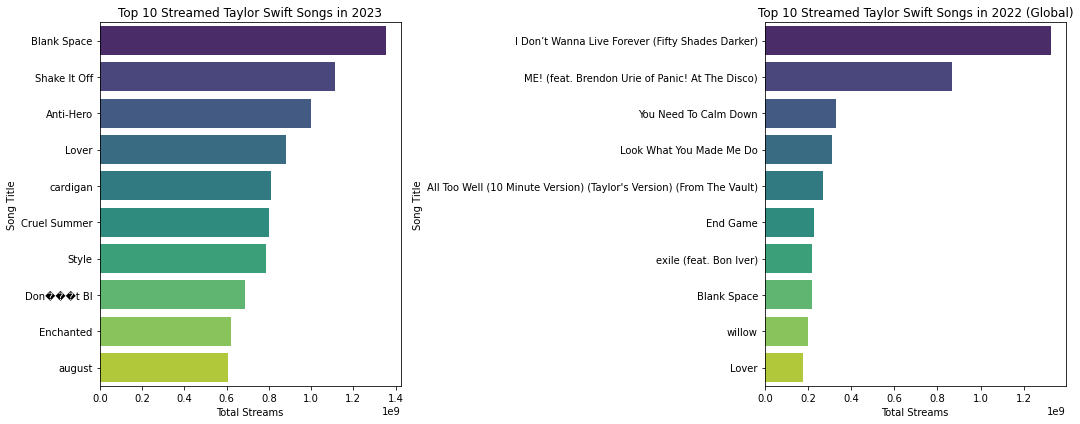

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the 2023 dataset to include only Taylor Swift's songs
taylor_swift_2023 = df.filter(df["artist(s)_name"].contains("Taylor Swift"))

# Group by track_name and sum the streams for Taylor Swift's songs in 2023
taylor_swift_top_songs_2023 = taylor_swift_2023.groupBy("track_name").agg(F.sum("streams").alias("total_streams_2023")) \
                                               .orderBy(F.desc("total_streams_2023")).limit(10).toPandas()


# Filter the 2022 global dataset to include only Taylor Swift's songs
taylor_swift_2022_global = df2022_global.filter(df2022_global["artist_names"].contains("Taylor Swift"))

# Group by track_name and sum the streams for Taylor Swift's songs in 2022 global dataset
taylor_swift_top_songs_2022_global = taylor_swift_2022_global.groupBy("track_name").agg(F.sum("streams").alias("total_streams_2022_global")) \
                                                             .orderBy(F.desc("total_streams_2022_global")).limit(10).toPandas()

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot Taylor Swift's top 10 streamed songs for 2023
sns.barplot(x="total_streams_2023", y="track_name", data=taylor_swift_top_songs_2023, ax=axs[0], palette="viridis")
axs[0].set_title("Top 10 Streamed Taylor Swift Songs in 2023")
axs[0].set_xlabel("Total Streams")
axs[0].set_ylabel("Song Title")

# Plot Taylor Swift's top 10 streamed songs for 2022 global dataset
sns.barplot(x="total_streams_2022_global", y="track_name", data=taylor_swift_top_songs_2022_global, ax=axs[1], palette="viridis")
axs[1].set_title("Top 10 Streamed Taylor Swift Songs in 2022 (Global)")
axs[1].set_xlabel("Total Streams")
axs[1].set_ylabel("Song Title")

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


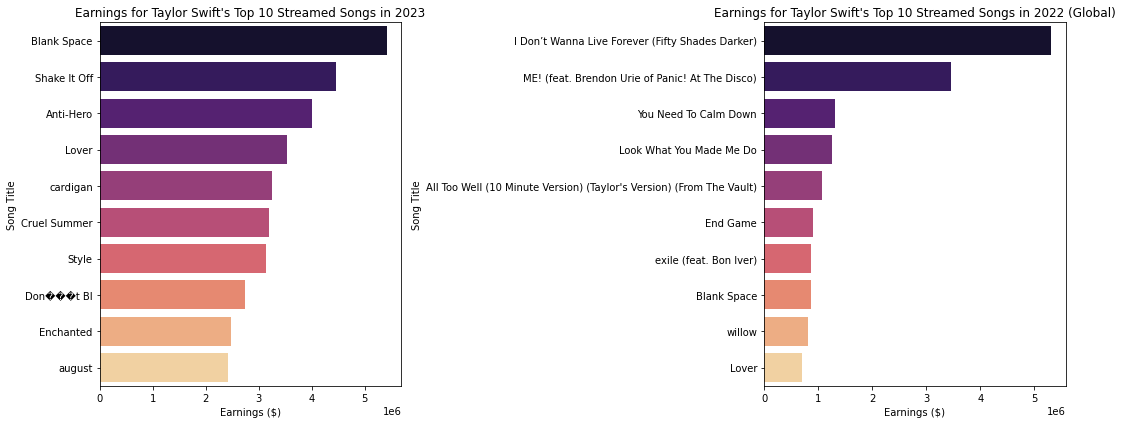

In [0]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

taylor_swift_top_songs_2023['earnings_2023'] = (taylor_swift_top_songs_2023['total_streams_2023'] * 0.04) / 10

# Calculate earnings for each song in 2022 global dataset
taylor_swift_top_songs_2022_global['earnings_2022_global'] = (taylor_swift_top_songs_2022_global['total_streams_2022_global'] * 0.04) / 10

# Plot earnings for 2023 dataset
sns.barplot(x="earnings_2023", y="track_name", data=taylor_swift_top_songs_2023, palette="magma", ax=axs[0])
axs[0].set_title("Earnings for Taylor Swift's Top 10 Streamed Songs in 2023")
axs[0].set_xlabel("Earnings ($)")
axs[0].set_ylabel("Song Title")

# Plot earnings for 2022 global dataset
sns.barplot(x="earnings_2022_global", y="track_name", data=taylor_swift_top_songs_2022_global, palette="magma", ax=axs[1])
axs[1].set_title("Earnings for Taylor Swift's Top 10 Streamed Songs in 2022 (Global)")
axs[1].set_xlabel("Earnings ($)")
axs[1].set_ylabel("Song Title")

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()



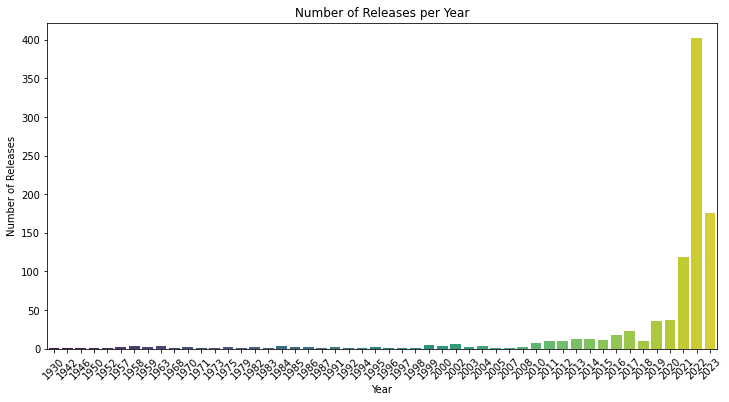

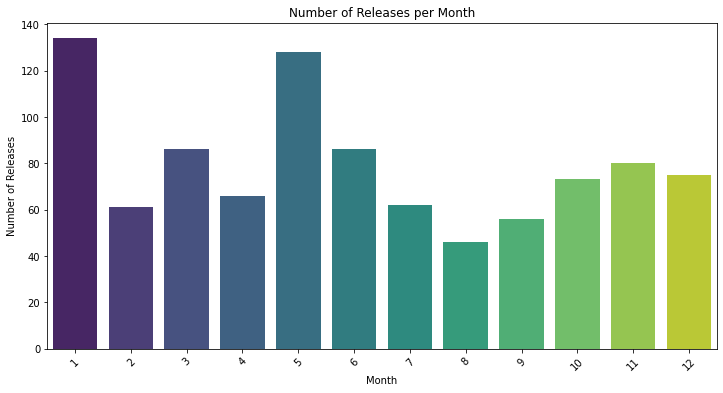

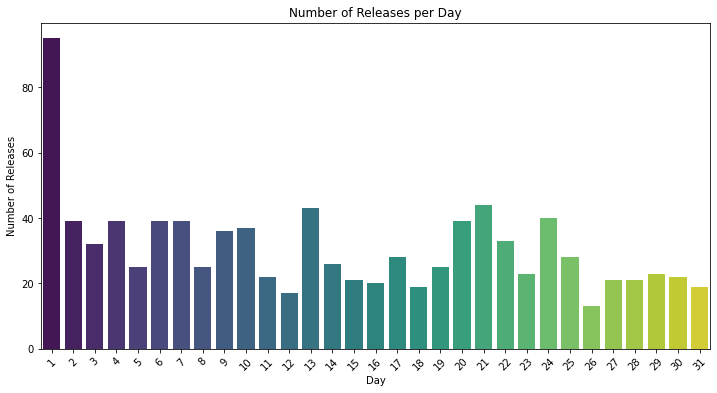

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql.functions import year, month, dayofmonth

# Count the number of releases per year
releases_per_year = df.groupBy('released_year').count().orderBy('released_year').toPandas()

# Count the number of releases per month
releases_per_month = df.groupBy('released_month').count().orderBy('released_month').toPandas()

# Count the number of releases per day
releases_per_day = df.groupBy('released_day').count().orderBy('released_day').toPandas()

# Plot the number of releases per year
plt.figure(figsize=(12, 6))
sns.barplot(x='released_year', y='count', data=releases_per_year, palette='viridis')
plt.title('Number of Releases per Year')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.xticks(rotation=45)
plt.show()

# Plot the number of releases per month
plt.figure(figsize=(12, 6))
sns.barplot(x='released_month', y='count', data=releases_per_month, palette='viridis')
plt.title('Number of Releases per Month')
plt.xlabel('Month')
plt.ylabel('Number of Releases')
plt.xticks(rotation=45)
plt.show()

# Plot the number of releases per day
plt.figure(figsize=(12, 6))
sns.barplot(x='released_day', y='count', data=releases_per_day, palette='viridis')
plt.title('Number of Releases per Day')
plt.xlabel('Day')
plt.ylabel('Number of Releases')
plt.xticks(rotation=45)
plt.show()

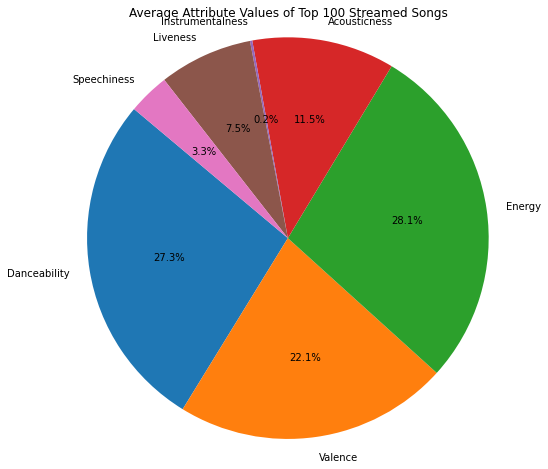

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql.functions import col
from pyspark.sql.types import LongType
from pyspark.sql.functions import desc

# Convert "streams" column to long integer type
df = df.withColumn("streams", col("streams").cast(LongType()))

# Filter the DataFrame to include only the top 100 streamed songs
top_100_songs = df.orderBy(desc("streams")).limit(100)

# Calculate the average values for each attribute
average_attributes = top_100_songs.selectExpr(
    "avg(`danceability_%`) as avg_danceability",
    "avg(`valence_%`) as avg_valence",
    "avg(`energy_%`) as avg_energy",
    "avg(`acousticness_%`) as avg_acousticness",
    "avg(`instrumentalness_%`) as avg_instrumentalness",
    "avg(`liveness_%`) as avg_liveness",
    "avg(`speechiness_%`) as avg_speechiness"
).collect()[0]

# Plot the average attribute values
attribute_names = ["Danceability", "Valence", "Energy", "Acousticness", "Instrumentalness", "Liveness", "Speechiness"]
average_values = [average_attributes[i] for i in range(7)]

plt.figure(figsize=(8, 8))
plt.pie(average_attributes, labels=attribute_names, autopct='%1.1f%%', startangle=140)
plt.title("Average Attribute Values of Top 100 Streamed Songs")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

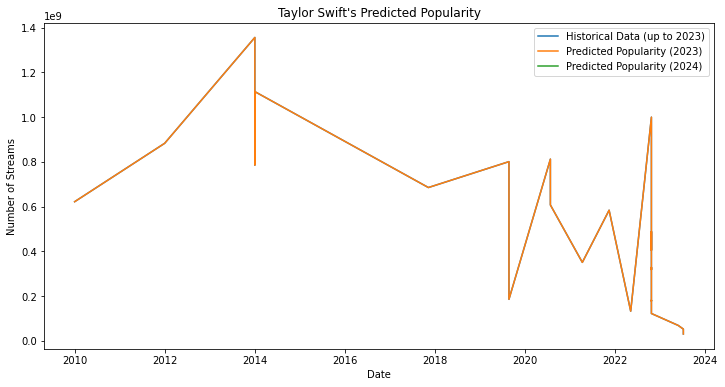

In [0]:
from pyspark.sql.functions import col, date_format
from pyspark.sql import functions as F
from pyspark.sql.window import Window
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing



from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.sql import functions as F

# Filter data for Taylor Swift
taylor_swift_data = df.filter(df["artist(s)_name"] == "Taylor Swift")

# Convert date columns to a single date column
taylor_swift_data = taylor_swift_data.withColumn("date", F.concat(F.col("released_year"), F.lit("-"), F.col("released_month"), F.lit("-"), F.col("released_day")))
taylor_swift_data = taylor_swift_data.withColumn("date", F.to_timestamp("date"))

# Select relevant columns
taylor_swift_data = taylor_swift_data.select("date", "streams")

# Create a feature vector
assembler = VectorAssembler(inputCols=["streams"], outputCol="features")
taylor_swift_data = assembler.transform(taylor_swift_data)

# Split data into training and test sets (use data up to 2023 for training)
training_data = taylor_swift_data.filter(F.year("date") <= 2023)
test_data = taylor_swift_data.filter(F.year("date") > 2023)

# Train a linear regression model
lr = LinearRegression(featuresCol="features", labelCol="streams")
lr_model = lr.fit(training_data)

# Make predictions for 2023 and 2024
predictions_2023 = lr_model.transform(training_data)
predictions_2024 = lr_model.transform(test_data)

# Convert predictions to Pandas for visualization

predictions_2023_pd = predictions_2023.select("date", "streams", "prediction").orderBy("date").toPandas()
predictions_2024_pd = predictions_2024.select("date", "streams", "prediction").orderBy("date").toPandas()

# Plot the predicted popularity
plt.figure(figsize=(12, 6))
plt.plot(predictions_2023_pd["date"], predictions_2023_pd["streams"], label="Historical Data (up to 2023)")
plt.plot(predictions_2023_pd["date"], predictions_2023_pd["prediction"], label="Predicted Popularity (2023)")
plt.plot(predictions_2024_pd["date"], predictions_2024_pd["prediction"], label="Predicted Popularity (2024)")
plt.title("Taylor Swift's Predicted Popularity")
plt.xlabel("Date")
plt.ylabel("Number of Streams")
plt.legend()
plt.show()



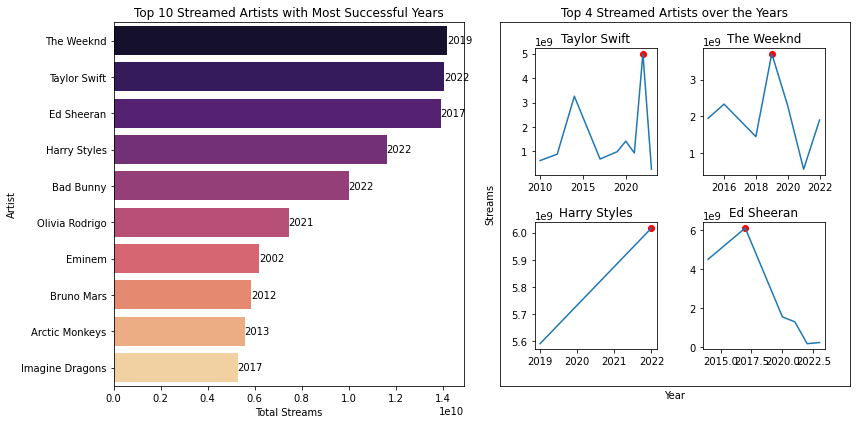

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql import functions as F



# Group the data by artist(s) name and sum the streams to find the total streams for each artist
artist_streams = df.groupBy("artist(s)_name").agg(F.sum("streams").alias("total_streams"))

# Order the artists by total streams in descending order and select the top 10
top_10_artists = artist_streams.orderBy(F.desc("total_streams")).limit(10)

# Initialize lists to store artist names, total streams, and most successful years
artists = []
total_streams = []
most_successful_years = []

# For each artist in the top 10, find their most successful year by streams
for row in top_10_artists.collect():
    artist_name = row["artist(s)_name"]
    total_stream_count = row["total_streams"]
    most_successful_year_row = df.filter(df["artist(s)_name"] == artist_name) \
                                 .groupBy("released_year") \
                                 .agg(F.sum("streams").alias("total_streams")) \
                                 .orderBy(F.desc("total_streams")).first()
    most_successful_year = most_successful_year_row["released_year"]
    
    # Append data to lists
    artists.append(artist_name)
    total_streams.append(total_stream_count)
    most_successful_years.append(most_successful_year)

# Initialize list to store data for line plots
line_plot_data = []

# For each artist in the top 4, create a DataFrame with streams over years
for artist in artists[:4]:
    artist_data = df.filter(df["artist(s)_name"] == artist).groupBy("released_year").agg(F.sum("streams").alias("total_streams")).orderBy("released_year").toPandas()
    peak_year = artist_data.loc[artist_data["total_streams"].idxmax()]  # Find peak year
    line_plot_data.append((artist, artist_data, peak_year))

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot bar plot on the left subplot
sns.barplot(x=total_streams, y=artists, palette="magma", ax=axs[0])
axs[0].set_xlabel('Total Streams')
axs[0].set_ylabel('Artist')
axs[0].set_title('Top 10 Streamed Artists with Most Successful Years')

# Annotate bars with most successful years
for i, row in enumerate(most_successful_years):
    axs[0].text(total_streams[i] + 1000000, i, str(row), va='center')

# Plot line charts for the top 4 artists in the right subplot
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Streams')
axs[1].set_title('Top 4 Streamed Artists over the Years')
axs[1].set_xticks([])
axs[1].set_yticks([])

# Divide the subplot into four subplots
for i, (artist, artist_data, peak_year) in enumerate(reversed(line_plot_data)):
    row = i // 2
    col = i % 2
    ax = axs[1].inset_axes([0.1 + col * 0.48, 0.1 + row * 0.48, 0.35, 0.35])
    ax.plot(artist_data["released_year"], artist_data["total_streams"])
    ax.scatter(peak_year["released_year"], peak_year["total_streams"], color='red', label=f"Peak: {peak_year['total_streams']} Streams in {peak_year['released_year']} ({artist})")
    
   
    ax.set_title(artist)
    



plt.tight_layout()
plt.show()


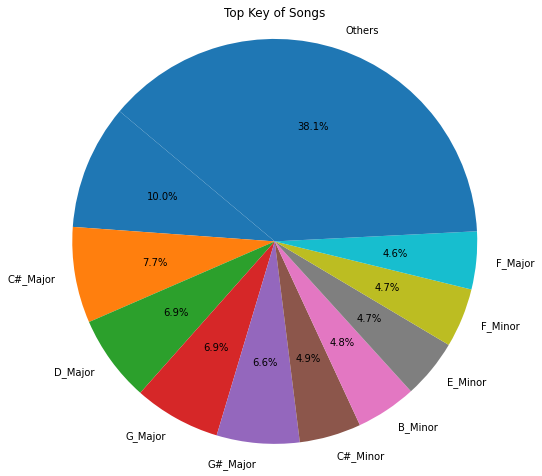

In [0]:
import matplotlib.pyplot as plt
from pyspark.sql import functions as F

df = df.withColumn("key_mode", F.concat(F.col("key"), F.lit("_"), F.col("mode")))

# Count occurrences of each key_mode
key_mode_counts = df.groupBy("key_mode").count()

# Sort by count in descending order
key_mode_counts = key_mode_counts.orderBy(F.desc("count"))

# Extract top 5 keys/modes
top_5_key_modes = key_mode_counts.limit(10)

# Sum counts of all other key/mode combinations
other_count = key_mode_counts.subtract(top_5_key_modes).select(F.sum("count")).collect()[0][0]

# Create DataFrame for pie chart
pie_data = top_5_key_modes.toPandas()
pie_data.loc[len(pie_data)] = ["Others", other_count]

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(pie_data["count"], labels=pie_data["key_mode"], autopct='%1.1f%%', startangle=140)
plt.title("Top Key of Songs")
plt.axis('equal')
plt.show()

In [0]:
from pyspark.sql.functions import floor
from pyspark.sql import functions as F
from pyspark.sql.window import Window
import re


# Calculate the decade of release for each song
df = df.withColumn("decade", floor(df["released_year"] / 10) * 10)

# Create a window function to rank songs within each decade based on streams
windowSpec = Window.partitionBy("decade").orderBy(F.desc("streams"))

# Add a rank column to the DataFrame indicating the rank of each song within its decade
df = df.withColumn("rank", F.rank().over(windowSpec))

# Filter the DataFrame to include only the top 5 streamed songs for each decade
top_songs_by_decade = df.filter(F.col("rank") <= 5)

# Show the top songs by decade as tables
top_songs_by_decade.orderBy("decade", "rank").select("decade", "rank", "track_name", "streams").show() 

+------+----+--------------------+----------+
|decade|rank|          track_name|   streams|
+------+----+--------------------+----------+
|  1930|   1|         Agudo M��gi|  90598517|
|  1940|   1|     White Christmas| 395591396|
|  1940|   2|The Christmas Son...| 389771964|
|  1950|   1|Rockin' Around Th...| 769213520|
|  1950|   2|    Jingle Bell Rock| 741301563|
|  1950|   3|Let It Snow! Let ...| 473248298|
|  1950|   4|Let It Snow! Let ...| 446390129|
|  1950|   5|A Holly Jolly Chr...| 395591396|
|  1960|   1|Have You Ever See...|1145727611|
|  1960|   2|It's the Most Won...| 663832097|
|  1960|   3|         Sleigh Ride| 404664135|
|  1960|   4|Christmas (Baby P...| 242767149|
|  1970|   1|Bohemian Rhapsody...|2197010679|
|  1970|   2|             Riptide|2009094673|
|  1970|   3|            Dream On| 838586769|
|  1970|   4|       Feliz Navidad| 520034544|
|  1970|   5|Happy Xmas (War I...| 460492795|
|  1980|   1|Every Breath You ...|1593270737|
|  1980|   2| Sweet Child O' Mine|

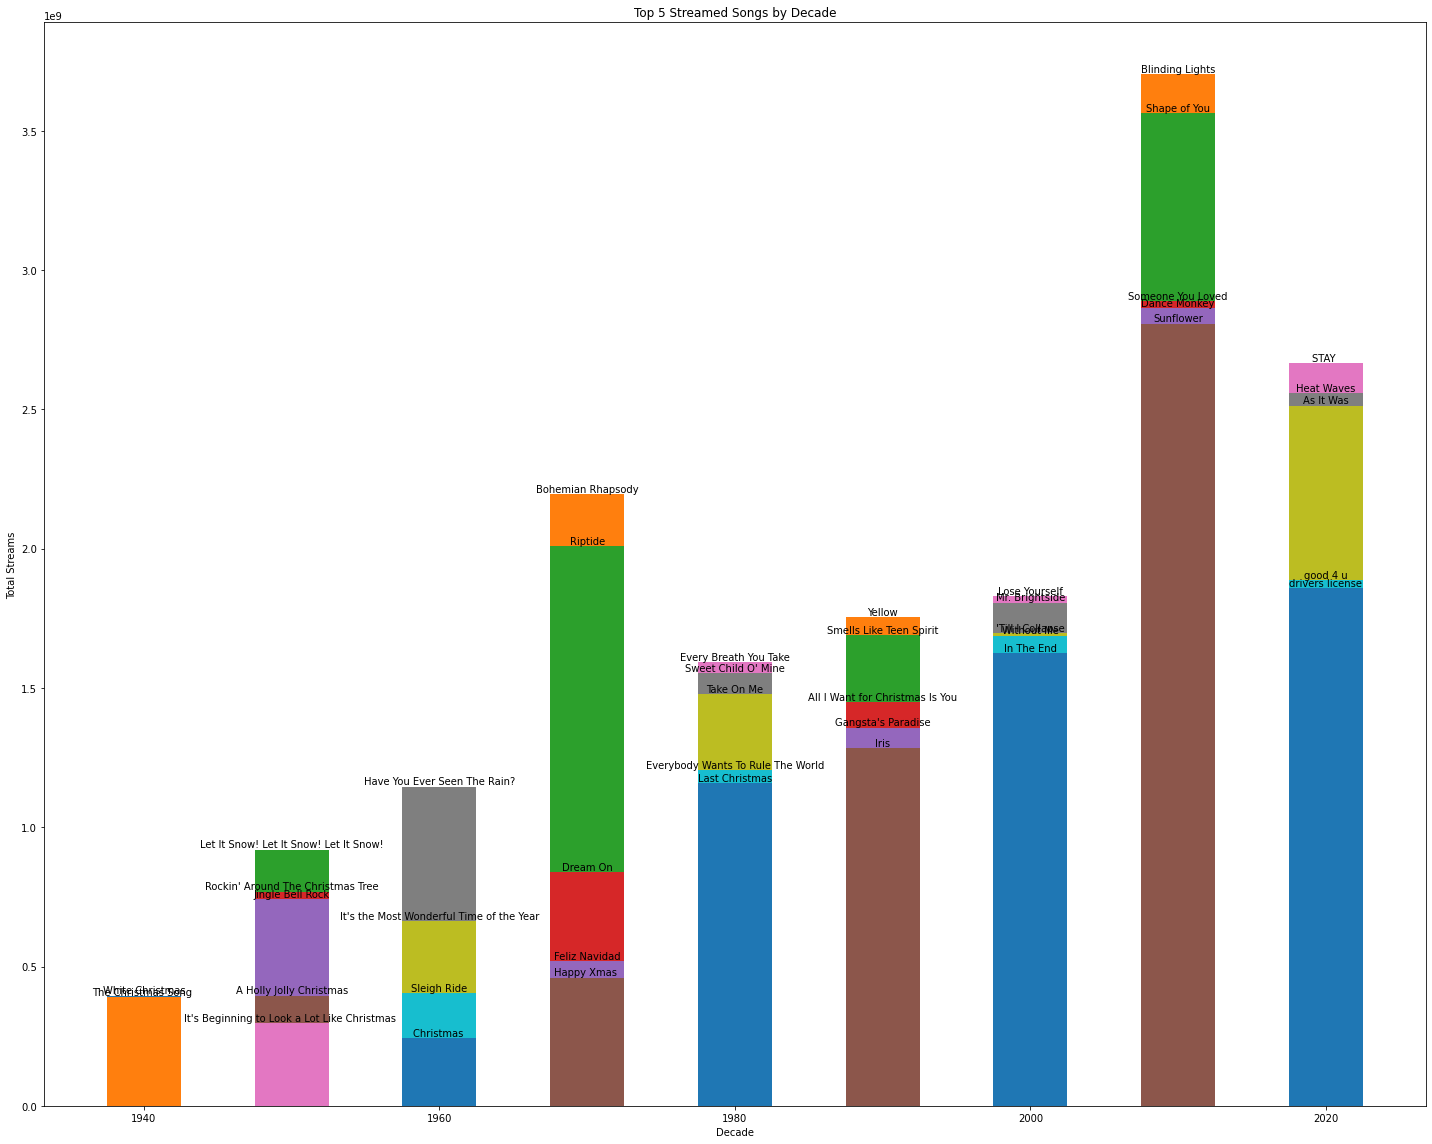

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql import functions as F
import re

# Assuming 'df' contains the streaming data

# Calculate the decade of release for each song
df = df.withColumn("decade", (F.floor(df["released_year"] / 10) * 10).cast("int"))
df = df.filter(df["decade"] >= 1940)


# Group the data by decade and track name, and sum the streams
grouped_df = df.groupBy("decade", "track_name").agg(F.sum("streams").alias("total_streams"))

# Rank songs within each decade based on streams
windowSpec = Window.partitionBy("decade").orderBy(F.desc("total_streams"))
ranked_df = grouped_df.withColumn("rank", F.rank().over(windowSpec))

# Filter to include only the top 5 streamed songs for each decade
top_songs_by_decade = ranked_df.filter(F.col("rank") <= 5)

# Convert Spark DataFrame to Pandas DataFrame for plotting
top_songs_pandas = top_songs_by_decade.toPandas()

# Remove brackets from track names
top_songs_pandas['track_name'] = top_songs_pandas['track_name'].apply(lambda x: re.sub(r'\([^()]*\)', '', x))
top_songs_pandas['track_name'] = top_songs_pandas['track_name'].apply(lambda x: re.sub(r' -.*$', '', x))



# Plot the bar chart
plt.figure(figsize=(20, 16))
for index, row in top_songs_pandas.iterrows():
    plt.bar(row['decade'], row['total_streams'], label=row['track_name'], width=5)

    # Annotate the bars with track names
    plt.text(row['decade'], row['total_streams'], row['track_name'], ha='center', va='bottom')

# Add labels and title
plt.xlabel('Decade')
plt.ylabel('Total Streams')
plt.title('Top 5 Streamed Songs by Decade')

plt.tight_layout()
plt.show()
